In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Colab_Notebooks/dispositivos_electronicos
%ls

# Fundamentos de física de dispositivos electrónicos


Se puede transmitir una comprensión física de cómo funcionan los dispositivos semiconductores sin profundizar demasiado en la física de los semiconductores, pero es necesaria una comprensión básica de algunos conceptos clave a nivel de un curso de introducción a la física del estado sólido o dispositivos semiconductores. Esta seccion resumirá algunos conceptos esenciales. 


## De los niveles de energía a las bandas de energía

### Niveles de energía discretos y estructura atómica

La solucion de la ecuación de Schrödinger describe los niveles de energía de un atomó en el que no se tiene en cuuenta la interacción entre electrones. Tiene la siguiente forma:
$$
E \psi=-\frac{\hbar^{2}}{2 \mu} \nabla^{2} \psi-\frac{Z q^{2}}{4 \pi \varepsilon_{0} r} \psi
$$
Dond $q$ es la carga del electrón, $e r$ es la posicion del electrón relativa al nucleo, $|\vec r|= r$ s la distancia al nuucleo, $Z$ es la carga del nuecleo $\varepsilon_{0}$ es la permitividad del vacio y finalmente
$$
\mu=\frac{m_{q} m_{p}}{m_{q}+m_{p}},
$$
es la masa reducida del electrón, siendo $m_{p}$ la masa del protón y $m_{q}$ la masa del electrón.
Típicamente esta ecuación se resuelve planteado una separación de variables como siguue:
$$
\psi(r, \theta, \varphi)=R(r) Y_{\ell}^{m}(\theta, \varphi)=R(r) \Theta(\theta) \Phi(\varphi)
$$
Donde $R$ es la función radial y $Y_{\ell}^{m}$ son los esféricos armónicos dee grado $\ell$ y orden $m$. El caso $Z=1$ s el único cuya solución analítica exacta se conoce: 
$$
\psi_{n \ell m}(r, \theta, \varphi)=\sqrt{\left(\frac{2}{n a_{0}}\right)^{3} \frac{(n-\ell-1) !}{2 n[(n+t) !]}} e^{-r / n a_{0}}\left(\frac{2 r}{n a_{0}}\right)^{\ell} L_{n-\ell-1}^{2 \ell+1}\left(\frac{2 r}{n a_{0}}\right) \cdot Y_{\ell}^{m}(\theta, \varphi)
$$
Donde se ha definido el rádio de Bohr,
$$
a_{0}=\frac{4 \pi \varepsilon_{0} \hbar^{2}}{m_{q} q^{2}} \approx 0.52 \unicode{x212B}
$$
Los polinómios ganaralizados de Laguerre, $L_{n-\ell-1}^{2 \ell+1}(\cdots)$, y los númueros cuánticos principal, $n$, azimutal, $\ell$, y magnético, $m$. los números cuánticos toman valores que satisfacen las siguientes condiciones:
$$
\begin{array}{l}
n=1,2,3, \ldots \\
\ell=0,1,2, \ldots, n-1 \\
m=-\ell, \ldots, \ell
\end{array}
$$
La strcutura de capas de un átomo se origina por el número cuántico $\ell$ y a cada capa se le asigna una letra según el valor de $\ell$:

$\ell$ | Letra      | # orbitales
--|:---------:|:-----------:
0|S      | 1
1|P   | 3
2|D   | 5
3|F   | 7
4|G   | 9
5|H   | 11
6|I   | 13

Cada orbital puede acomodar bien sea dos electrones (uno con espin $\uparrow$ y otro con espin $\downarrow$), o un espin (con espin $\uparrow$ o $\downarrow$), o ninguno.

#### Como lucen los orbitales?

En este dominio, generalmente se definen incluyendo un factor de $ (- 1) ^ m $ (la convención de fase de Condon-Shortley):
$$
Y_{l}^{m}(\theta, \varphi)=(-1)^{m} \sqrt{\frac{(2 l+1)}{4 \pi} \frac{(l-m) !}{(l+m) !}} P_{lm}(\cos \theta) e^{i m \varphi}
$$
donde $ P_{lm}(\cos \theta) $ es un polinomio de Legendre asociado (sin el factor de $ (- 1) ^ m $).

Dado que $Y_{l}^{m}(\theta, \varphi)$ son funciones complejas de ángulo, a menudo se considera más conveniente usar sus formas reales para su representación en figuras y en algunos cálculos. Una base real adecuada de armónicos esféricos puede definirse como:
$$
Y_{l m}=\left\{\begin{array}{ll}
\sqrt{2}(-1)^{m} \operatorname{Im}\left[Y_{l}^{|m|}\right] & \text { if } m<0 \\
Y_{l}^{0} & \text { if } m=0 \\
\sqrt{2}(-1)^{m} \operatorname{Re}\left[Y_{l}^{m}\right] & \text { if } m>0
\end{array}\right.
$$
El siguiente código utiliza la rutina special.sph_harm de SciPy para calcular los armónicos esféricos, que luego se convierten en estas funciones reales y se muestran en un diagrama de Matplotlib tridimensional. 

In [ ]:
# dependences for ploting solid harmonics
!dpkg --configure -a
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# The following import configures Matplotlib for 3D plotting.
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
plt.rc('text', usetex=True)

# Grids of polar and azimuthal angles
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
# Create a 2-D meshgrid of (theta, phi) angles.
theta, phi = np.meshgrid(theta, phi)
# Calculate the Cartesian coordinates of each point in the mesh.
xyz = np.array([np.sin(theta) * np.sin(phi),
                np.sin(theta) * np.cos(phi),
                np.cos(theta)])

def plot_Y(ax, el, m):
    """Plot the spherical harmonic of degree el and order m on Axes ax."""

    # NB In SciPy's sph_harm function the azimuthal coordinate, theta,
    # comes before the polar coordinate, phi.
    Y = sph_harm(abs(m), el, phi, theta)

    # Linear combination of Y_l,m and Y_l,-m to create the real form.
    if m < 0:
        Y = np.sqrt(2) * (-1)**m * Y.imag
    elif m > 0:
        Y = np.sqrt(2) * (-1)**m * Y.real
    Yx, Yy, Yz = np.abs(Y) * xyz

    # Colour the plotted surface according to the sign of Y.
    cmap = plt.cm.ScalarMappable(cmap=plt.get_cmap('YlGn'))
    cmap.set_clim(-0.5, 0.5)

    ax.plot_surface(Yx, Yy, Yz,
                    facecolors=cmap.to_rgba(Y.real),
                    rstride=2, cstride=2)

    # Draw a set of x, y, z axes for reference.
    ax_lim = 0.5
    ax.plot([-ax_lim, ax_lim], [0,0], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [-ax_lim, ax_lim], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [0,0], [-ax_lim, ax_lim], c='0.5', lw=1, zorder=10)
    # Set the Axes limits and title, turn off the Axes frame.
    ax.set_title(r'$Y_{{{},{}}}$'.format(el, m))
    ax_lim = 0.5
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)
    ax.axis('off')

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(projection='3d')
l, m = 3, 0
plot_Y(ax, l, m)
plt.savefig('Y{}_{}.png'.format(l, m))
plt.show()

To plot a family of shell:

In [ ]:
el_max = 5
figsize_px, DPI = 800, 100
figsize_in = figsize_px / DPI
fig = plt.figure(figsize=(figsize_in, figsize_in), dpi=DPI)
spec = gridspec.GridSpec(ncols=2*el_max+1, nrows=el_max+1, figure=fig)
for el in range(el_max+1):
    for m_el in range(-el, el+1):
        print(el, m_el)
        ax = fig.add_subplot(spec[el, m_el+el_max], projection='3d')
        plot_Y(ax, el, m_el)
plt.tight_layout()
#plt.savefig('sph_harm.png')
plt.show()

#### Cual es la nergía por orbital?

Se puede utilizar el paquete Symbolic Python (SymPy) para obtener las soluciones aproximadas para atomos hidrogenoides.

In [ ]:
from __future__ import division
from sympy import  symbols
n,l,m,Z = symbols('n l m Z')
from sympy.physics.hydrogen import E_nl, R_nl,Psi_nlm

In [ ]:
help(Psi_nlm)

In [ ]:
help(E_nl)

In [ ]:
from sympy.abc import n, Z
E_nl(1, 1)*13.6

In [ ]:
help(R_nl)

### Varios niveles de energía agrupados forman bandas de energía 

Nos concentraresmos en el caso del átomo de silicio. El silicio tiene un número atómico de 14; tiene 14 electrones cuyo negativo
 las cargas están equilibradas por las cargas positivas de 14 protones en el
 núcleo. Aprendemos en química de primer año que estos catorce electrones
 ocupan varios niveles de energía asociados con los orbitales moleculares. los
 El nivel de energía más bajo es el orbital $ n  = 1s$, que puede acomodar dos
 electrones (uno con espín $\uparrow$ y el otro con espín $\downarrow$). El siguiente nivel de energía es el orbital  $n = 2S$, que puede acomodar dos
 electrones (uno con espín $\uparrow$ y el otro con espín $\uparrow$), Luego los tres orbitales $n= 2p$ $p_x$, $p_y$ y $p_z$. Cada uno de los tres orbitales $p$ puede acomodar dos electrones (uno con espín $\uparrow$ y el otro con espín $\downarrow$) seis electrones en total.
 Los siguientes son los orbitales $n=3s$ que puede acomodar dos electrones (uno con espín $\uparrow$ y el otro con espín $\downarrow$),   y $n=3p$ que acomoda los dos electrones restantes, estos se acomodan de tal manera los dos espines bien sea $\uparrow$ o $\downarrow$ quedan en orbitales separados, estos cuatro electrones se denominan electrones de valencia.
La configuración orbital para Si es $1 s^{2} 2 s^{2} 2 p^{6} 3 s^{2} 3 p^{2}$.

Por otra parte para el nivel $n=3$ se tienen las capas $3s$ y $3p$ que ofrecen ocho estados para comodar electrones y salvo los cuatro orbitales ocupados por los electrones de valencia que son responsables del enlace químico,  nos quedan cuatro orbitales más y al modificar la población de estos orbitales de diferentes formas se pueden  generar diferentes dispositivos electrónicos.

El semiconductor utilizado para la mayoría de los dispositivos semiconductores, como los transistores, es el silicio, y la mayoría de los transistores de silicio están fabricados con silicio monocristalino de alta calidad en el que cada átomo de silicio se une covalentemente con los cuatro vecinos más cercanos en la llamada estructura reticular de diamante. La densidad de los átomos de Si es aproximadamente $N_A = 5 × 10^{22} cm^{−3}$, y el espaciado vecino más cercano es $0.235 nm$. Dado que había ocho estados de electrones de valencia con 4 de ellos ocupados para cada átomo de Si, esperamos encontrar $8 \times N_A$ estados de valencia en el cristal con $4\times N_A$ de ellos ocupados. Eso es lo que sucede, pero la interacción cuántica de los electrones desplaza las energías y las amplía. La mitad de los estados disminuyen en energía y se convierten en los "estados de enlace" responsables de los enlaces covalentes en la red de Si, y la otra mitad de los estados (los estados anti-enlace) aumentan en energía.

Los niveles de energía de electrones llenos de 4NA se convierten en estados ocupados por $4\times N_A$ en un rango de energías llamado banda de valencia (como se muestra en la figura de abajo). Los estados desocupados $4\times N_A$ se convierten en una banda de estados desocupados conocida como banda de conducción (como se muestra en la figura de abajo). En la figura de abajo, la parte superior de la banda de valencia está separada de la parte inferior de la banda de conducción por una "brecha de energía" (o banda prohibida), que es aproximadamente $1.12 eV$ para Si. En $T = 0K$, todos los estados $4\times N_A$ en la banda de valencia están ocupados y todos los estados $4\times N_A$ en la banda de conducción están vacíos.
A una temperatura finita, la red de Si vibra y tiene una energía térmica promedio de $3k_B T / 2$, donde $k_B$ es la constante de Boltzman. A temperatura ambiente, $T = 300 K$, $k_B T = 0.026 eV$, que es aproximadamente $40$ veces más pequeño que el intervalo de banda del Si. En promedio, no hay suficiente energía térmica disponible para romper los enlaces covalentes y promover electrones de la banda de valencia a la banda de conducción, pero existe una pequeña probabilidad de excitar térmicamente un electrón de la banda de valencia a la banda de conducción. Como se muestra en la figura de abajo, esto significa que habrá una pequeña probabilidad de estados vacíos (llamados huecos) en la valencia y una pequeña probabilidad de estados llenos cerca de la parte inferior de la banda de conducción. La densidad de electrones en la banda de conducción es igual a la densidad de los huecos en la banda de valencia y se conoce como la *concentración de portador intrínseco*, $n_i$. Para el silicio a temperatura ambiente, $ni \approx 10^{10} cm ^{− 3 }$.
 
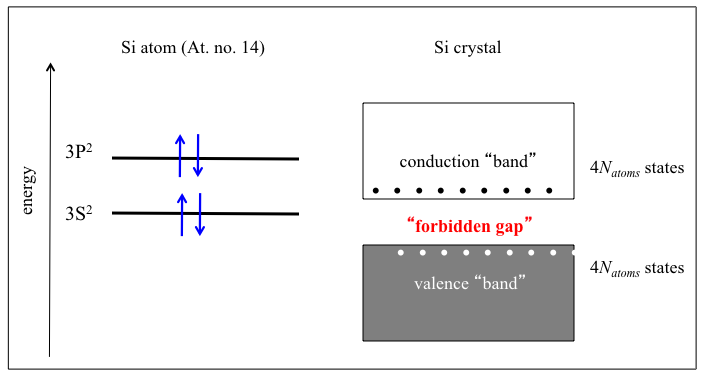

Un MOSFET de Si (uno de los dispositivos semiconductores más importantes) consta de un electrodo de compuerta metálico y contactos de fuente y drenaje, un aislante de compuerta de $SiO_2$ y el sustrato de Si. La figura de abajo ilustra las diferencias entre las bandas de energía de estos materiales. En un aislante, la banda de valencia está llena de electrones, pero la banda prohibida es muy grande, por lo que prácticamente no hay probabilidad de promover un electrón de la banda de valencia a la banda de conducción, por lo que no existen huecos en la banda de valencia ni electrones en la banda de conducción. Un metal es diferente porque los estados de los electrones se llenan hasta la mitad de una banda. Los metales conducen muy bien la electricidad y los aislantes tienen una conductividad insignificante. En un semiconductor, podemos cambiar el número de huecos en la banda de valencia y electrones en la banda de conducción variando la temperatura o introduciendo una pequeña concentración de dopantes en la red de Si. Se puede hacer que la conductividad de un semiconductor varíe en muchos órdenes de magnitud, desde casi metálico hasta casi aislante, que es lo que
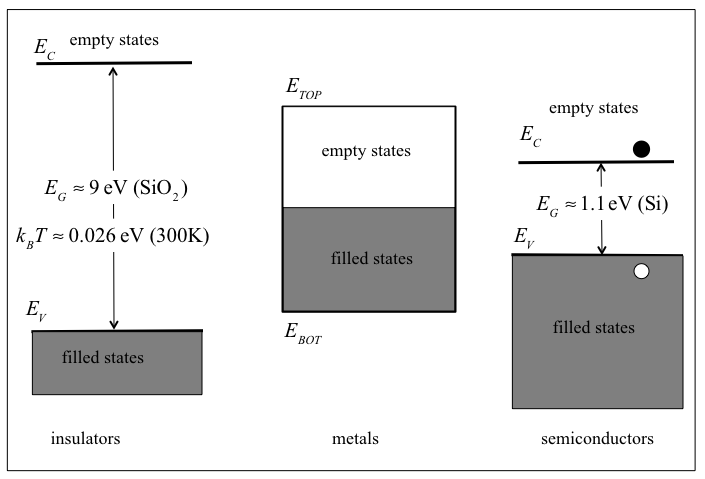

A temperatura ambiente, existe suficiente energía térmica para romper algunos de los enlaces covalentes, un proceso que se conoce como generación térmica. Cuando se rompe un enlace covalente, se libera un electrón. El electrón libre puede alejarse de su átomo padre y está disponible para conducir corriente eléctrica si se aplica un campo eléctrico al cristal. Cuando el electrón abandona su átomo padre, deja una carga neta positiva, igual a la magnitud de la carga del electrón. Por lo tanto, un electrón de un átomo vecino puede ser atraído por esta carga positiva y dejar su átomo original. Esta acción llena el "hueco" que existía en el átomo ionizado, pero crea un nuevo hueco en el otro átomo. Este proceso puede repetirse, con el resultado de que efectivamente tenemos un portador cargado positivamente, o un hueco, que se mueve a través de la estructura del cristal de silicio y está disponible para conducir la corriente eléctrica. La carga de un agujero es igual en magnitud a la carga de un electrón. Por lo tanto, podemos ver que a medida que aumenta la temperatura, se rompen más enlaces covalentes y se generan pares electrón-hueco. El aumento en el número de electrones libres y huecos da como resultado un aumento en la conductividad del silicio.

La generación térmica da como resultado electrones libres y huecos en igual número y, por tanto, concentraciones iguales, donde la concentración se refiere al número de portadores de carga por unidad de volumen ($cm^3$). Los electrones libres y los huecos se mueven aleatoriamente a través de la estructura del cristal de silicio y, en el proceso, algunos electrones pueden llenar algunos de los huecos. Este proceso, llamado recombinación, resulta en la desaparición de electrones libres y huecos. La tasa de recombinación es proporcional al número de electrones libres y huecos, que a su vez está determinada por la tasa de generación térmica. Este último es una función importante de la temperatura. En equilibrio térmico, la tasa de recombinación es igual a la tasa de generación, y se puede concluir que la concentración de electrones libres n es igual a la concentración de huecos p,
$$
n=p=n_{i}
$$
donde $n_i$ denota el número de electrones libres y huecos en una unidad de volumen ($cm^3$) de intrínseca
silicio a una temperatura determinada. Los resultados de la física de semiconductores dan $n_i$ como
$$
n_{i}=B T^{3 / 2} e^{-E_{g} / 2 k_{B} T}
$$
donde $ B $ es un parámetro dependiente del material que es $ 7.3 \times 10^{15}\mathrm{~ cm}^{- 3}\mathrm{~ K}^{- 3/2} $ para silicio; $ T $ es la temperatura en $ K$; $E_{g}$, un parámetro conocido como energía de banda prohibida, es $ 1.12 $ electronvoltio (eV) para silicio y $k_{B}$ es la constante de Boltzmann $ \left(8.62 \times 10 ^ {- 5 } \mathrm{eV}/ \mathrm{K}\right) $. Es interesante saber que la energía de banda prohibida $ E_ {g} $ es la energía mínima requerida para romper un enlace covalente y generar así un par electrón-hueco.

Finalmente, es útil para propósitos futuros expresar el producto de la concentracion de huecos y la concentración de electrones libres como
$$
p n = n_ {i} ^ {2}
$$
donde para el silicio a temperatura ambiente, $ n_ {i} \simeq 1.5 \times 10^{10} / \mathrm{cm}^{3} $. Como se verá en la siguieente sección, esta relación se extiende también al silicio extrínseco o dopado.

####Ejemplo

Calcule el valor de $n_i$ para el silicio a temperatura ambiente ($T \simeq 300$ Kelvin).

#####Solución

In [ ]:
import math
#Variable Declaration

B = 7.3*10**15      # Parameter for Si
T = 300             # Temperature in Kelvin
E_g = 1.12          # Gap energy for Si
k_B = 8.62*10**-5   # Boltzman constant in eV/Kelvin

# Calculations

exp_arg = -E_g/(2*k_B*T)
n_i = B*T**(3/2)*math.exp(exp_arg)
print("n_i = {:.4E}".format(n_i))

Aunque este número parece grande, para ponerlo en contexto, tenga en cuenta que el silicio tiene $ 5\times 10^{22} $ átomos $ / \mathrm{cm}^{3} $. Por lo tanto, a temperatura ambiente, solo uno de cada $ 5 \times 10^{12} $ átomos está ionizado y contribuye con un electrón libre y un hueco.

### El dopaje y la densidad de portadores

Lo que hace que los semiconductores sean tan útiles en la fabricación de dispositivos electrónicos es el hecho de que en un semiconductor es posible cambiar fácilmente las densidades de los huecos en la banda de valencia y los electrones en la banda de conducción. Dicho de otra manera, se puede colocar el nivel de Fermi desde cerca de la parte superior de la banda de valencia hasta cerca de la parte inferior de la banda de conducción o en cualquier punto intermedio. Una forma de hacerlo es dopando el semiconductor. (Otra forma es usar una compuerta para cambiar el potencial electrostático dentro del semiconductor, en argot más tecnico *gating*.) La figura de abajo ilustra cómo dopar un semiconductor sustituyendo átomos de Si por una pequeña concentración de átomos dopantes. El diagrama bidimensional pretende ilustrar el enlace tridimensional en el que cada átomo de Si forma enlaces químicos con cuatro vecinos más cercanos. Si un átomo de Si (en la columna IV de la tabla periódica con cuatro electrones de valencia) es reemplazado por un elemento como fósforo o arsénico de la columna V con cinco electrones de valencia, entonces el dopante forma enlaces covalentes con los cuatro vecinos de silicio, pero el quinto electrón de valencia está débilmente ligado. La pequeña cantidad de energía térmica disponible a temperatura ambiente puede romper este enlace débil y promover el electrón a la banda de conducción de Si dejando atrás un átomo dopante cargado positivamente porque ha perdido un electrón.
La figura d abajo también muestra lo que sucede cuando un dopante de la columna III de la tabla periódica (por ejemplo, boro) se sustituye por un átomo de Si. En este caso, el dopante tiene tres electrones de valencia, por lo que puede formar enlaces covalentes con tres de los cuatro vecinos. Solo se necesita un poco de energía térmica para remover un electrón de un enlace Si$:$Si y colocarlo en el sitio dopante y llenar el enlace covalente faltante. El dopante ahora tiene carga negativa porque tiene un electrón extra, pero nos falta un enlace Si$:$Si, por lo que hemos creado un hueco en la banda de valencia. Al introducir pequeñas cantidades de impurezas de la columna V o de la columna III en la red de Si, podemos controlar la cantidad de electrones en la banda de conducción y los huecos en la banda de valencia.
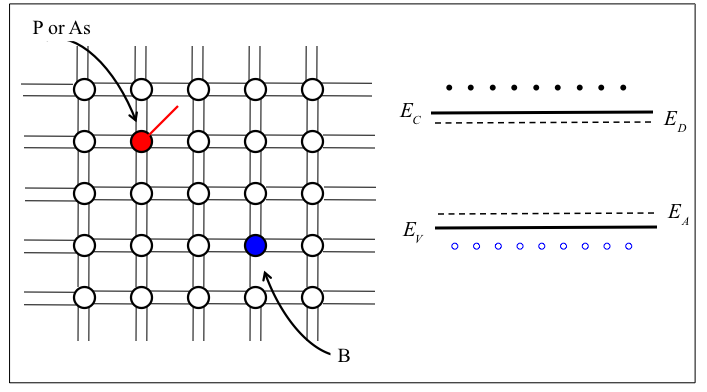

El dopaje implica la introducción de átomos de impurezas en el cristal de silicio en cantidades suficientes para aumentar sustancialmente la concentración de electrones libres o huecos, pero con poco o ningún cambio en las propiedades cristalinas del silicio. Para aumentar la concentración de electrones libres, n, el silicio se dopa con un elemento con una valencia de 5, como el fósforo (P). Se dice entonces que el silicio dopado resultante es de tipo n. Para aumentar la concentración de huecos, p, el silicio se dopa con un elemento que tiene una valencia de 3, como el boro (B), y se dice que el silicio dopado resultante es de tipo p.

Los átomos dopantes (fósforo) reemplazan algunos de los átomos de silicio en la estructura cristalina. Dado que el átomo de fósforo tiene cinco electrones en su capa exterior, cuatro de estos electrones forman enlaces covalentes con los átomos vecinos y el quinto electrón se convierte en un electrón libre. Así, cada átomo de fósforo dona un electrón libre al cristal de silicio y la impureza de fósforo se denomina donante. Sin embargo, debe quedar claro que este proceso no genera huecos. La carga positiva neta asociada con el átomo de fósforo es una carga unida que no se mueve a través del cristal. Si la concentración de átomos donantes es $ N_{D} $, donde $ N_{D} $ suele ser mucho mayor que $ n_{i} $, la concentración de electrones libres en el silicio de tipo $ n $ será
$$
n_ {n} \simeq N_{D}
$$
donde el subíndice $ n $ denota silicio de tipo $ n $. Así, $ n_ {n} $ está determinado por la concentración de dopaje y no por la temperatura. Sin embargo, este no es el caso de la concentración de agujeros. Todos los agujeros en el silicio de tipo $ n $ son los generados por ionización térmica. Su concentración $ p_ {n} $ se puede encontrar, siempre que se logre el equilibrio térmico. Por lo tanto, para silicio de tipo $ n $
$$
p_{n} n_{n} = n_{i}^{2}
$$
Sustituyendo $ n_{n} $, obtenemos por $ p_{n} $
$$
p_{n} \simeq \frac {n_{i}^{2}}{N_{D}}
$$
Así, $ p_{n} $ tendrá la misma dependencia de la temperatura que la de $ n_{i}^{2}. $ Finalmente, observamos que en el silicio de tipo $n$ la concentración de electrones libres $ n_{n} $ será mucho más grande que el de los agujeros. Por lo tanto, se dice que los electrones son los portadores de carga mayoritarios y los huecos son los portadores de carga minoritarios en el silicio de tipo $n$.

Para obtener silicio de tipo $p$ en el que los huecos son los portadores de carga mayoritarios, se utiliza una impureza trivalente como el boro.  Tenga en cuenta que los átomos de boro reemplazan algunos de los átomos de silicio en la estructura del cristal de silicio. Dado que cada átomo de boro tiene tres electrones en su capa exterior, acepta un electrón de un átomo vecino, formando así enlaces covalentes. El resultado es un agujero en el átomo vecino y una carga negativa ligada en el átomo aceptor (boro). De ello se deduce que cada átomo aceptor proporciona un agujero. Si la concentración de dopaje del aceptador es $ N_{A} $, donde $N_{A}\gg n_{i} $, la concentración de huecos se convierte en
$$
p_ {p} \simeq N_ {A}
$$
donde el subíndice $ p $ denota silicio de tipo $ p $. Por lo tanto, aquí los portadores mayoritarios son huecos y su concentración está determinada por $N_{A}$. La concentración de electrones minoritarios se puede encontrar usando la relación
$$
p_{p} n_{p} = n_{i}^{2}
$$
y sustituyendo $ p_{p} $,
$$
n_{p} \simeq \frac{n_{i}^{2}}{N_ {A}}
$$
Por tanto, la concentración de los electrones minoritarios tendrá la misma dependencia de la temperatura que la de $ n_{i}^{2} $.

Debe enfatizarse que una pieza de silicio de tipo $n$ o de tipo $p$ es eléctricamente neutra; la carga de la mayoría de los portadores libres (electrones en el tipo $n$ y huecos en el silicio tipo $p$) es neutralizada por las cargas ligadas asociadas con los átomos de impureza.

####Ejemplo

Considere un silicio de tipo $ n $ para el cual la concentración de dopante $ N_{D} = 10^{17} / \mathrm {cm} ^ {3} $. Encuentre las concentraciones de electrones y huecos en $ T = 300 \mathrm {~ K} $.

#####Solución

La concentración de la mayoría de electrones es
$$
n_ {n} \simeq N_{D} = 10 ^ {17} / \mathrm{cm} ^ {3}
$$
La concentración de los huecos minoritarios es
$$
p_ {n} \simeq \frac{n_{i}^{2}}{N_{D}}
$$
En el Ejemplo anterior encontramos que en $ T = 300 \mathrm{~ K}, n_{i} = 1.5 \times 10 ^ {10} / \mathrm {cm} ^ {3} $. Por lo tanto,
$$
p_ {n} = \frac{\left(1.5 \times 10 ^ {10} \right)^{2}}{10^{17}} 
$$
$$
p_{n} =  2.25 \times 10^{3} / \mathrm{cm}^{3}
$$
Observe que $ n_{n}\gg n_{i} $ y que $ n_{n} $ es mucho más alto que $ p_{n} $.

### Flujo de corriente en semiconductores

Hay dos mecanismos claramente diferentes para el movimiento de los portadores de carga y, por lo tanto, para el flujo de corriente en los semiconductores: arrastre y difusión.

#### Conducción por arrastre

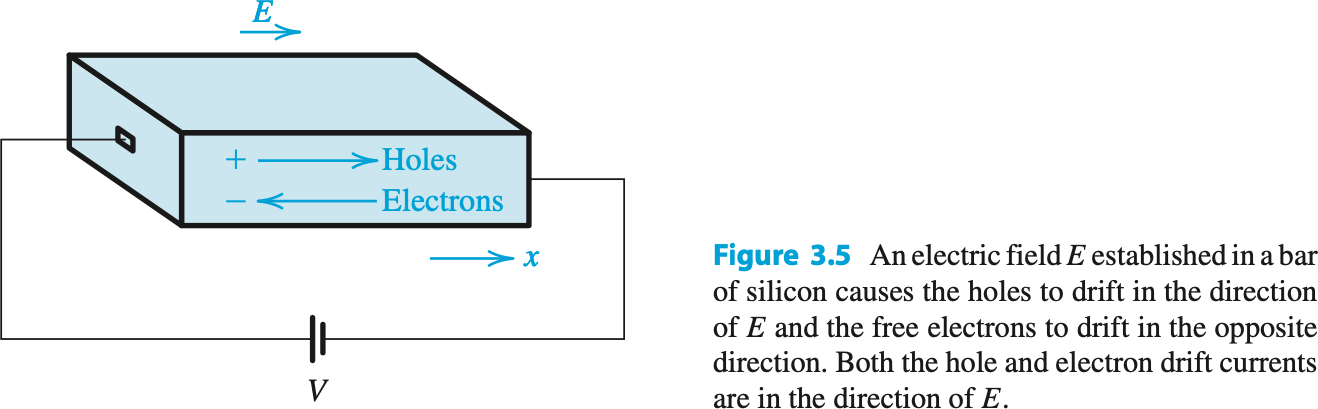

Cuando se establece un campo eléctrico $ E $ en un cristal semiconductor, los huecos se aceleran en la dirección de $ E $ y los electrones libres se aceleran en la dirección opuesta a la de $ E $. Los agujeros adquieren una velocidad $ v_ {p \text{-drift}} $ dada por
$$
v_ {p\text{-drift}} = \ mu_ {p} E
$$
donde $\ mu_{p} $ es una constante llamada movilidad del agujero: representa el grado de facilidad con que los agujeros se mueven a través del cristal de silicio en respuesta al campo eléctrico $E$. Dado que la velocidad tiene las unidades de centímetros por segundo y $ E $ las unidades de voltios por centímetro, vemos en la Ec. (3.8) que la movilidad $\mu_{p} $ debe tener las unidades de centímetros al cuadrado por voltio-segundo $\left (\mathrm{cm}^{2} /\mathrm {V} \cdot \mathrm{s} \right). $ Para silicio intrínseco $\mu_ {p}=480 \mathrm{~ cm} ^ {2} / \mathrm{V} \cdot\mathrm{s}$

Los electrones libres adquieren una velocidad de deriva $ v_{n\text{-drift}} $ dada por
$$
v_ {n\text{-drift}} = - \ mu_ {n} E
$$
donde el resultado es negativo porque los electrones se mueven en la dirección opuesta a $E$. Aquí $\mu_{n} $ es la movilidad de los electrones, que para el silicio intrínseco es de aproximadamente $1350\mathrm{~ cm}^{2}/\mathrm {V} \cdot s$. Tenga en cuenta que $\mu_{n} $ es aproximadamente $ 2.5 $ veces $ \mu_{p} $, lo que significa que los electrones se mueven con mucha mayor facilidad a través del cristal de silicio que los agujeros.

Sea la concentración de huecos $ p $ y la de electrones libres $ n $. Deseamos calcular la componente de corriente debido al flujo de huecos. Considere un plano perpendicular a la dirección $x$. En un segundo, la carga del hueco que cruza ese plano será $ \left(Aqpv_{p \text{-drift}}\right) $ coulombs, donde $ A $ es el área de la sección transversal de la barra de silicio y $ q $ es la magnitud de la carga del electrón. Este debe ser entonces el componente del agujero de la corriente de deriva que fluye a través de la barra,
$$
I_ {p} = Aqpv_{p \text {-drift}}
$$
Sustituyendo $ v_{\text{p-drift}}$, obtenemos
$$
I_ {p} = A q p \ mu_{p} E
$$
Por lo general, estamos interesados ​​en la densidad corriente $ J_{p} $, que es la corriente por unidad de área de sección transversal,
$$
J_ {p} = \frac {I_{p}} {A} = q p \mu_{p} E
$$
La componente de corriente debida a la deriva de electrones libres se puede encontrar de manera similar. Sin embargo, tenga en cuenta que los electrones que se desplazan de derecha a izquierda dan como resultado una componente de corriente de izquierda a derecha. Esto se debe a la convención de tomar la dirección del flujo de corriente como la dirección del flujo de carga positiva y opuesta a la dirección del flujo de carga negativa. Por lo tanto,
$$
I_{n} = - Aqnv_{n \text{-drift}}
$$
Sustituyendo $ v_ {n\text {-drift}} $, obtenemos la densidad de corriente $ J_ {n} = I_{n}/A$ como
$$
J_{n} = qn\mu_{n} E
$$
La densidad de corriente de arrastre total ahora se puede encontrar sumando $ J_ {p} $ y $ J_ {n} $,
$$
J = J_{p} + J_{n} = q \left(p\mu_{p} + n\mu_{n} \right) E
$$
Esta relación se puede escribir como
$$
J = \sigma E
$$
o equivalentemente
$$
J = E/\rho
$$
donde la conductividad $ \sigma $ viene dada por
$$
\sigma = q\left (p\mu_{p} + n\mu_{n} \right)
$$
y la resistividad $ \rho $ viene dada por
$$
\rho \equiv \frac{1}{\sigma} = \frac{1}{q \left(p\mu_{p} + n\mu_{n}\right)}
$$
Observe que la ecuación antrior para $J$ es una forma de la ley de Ohm y se puede escribir alternativamente como
$$
\rho = \frac{E}{J}
$$
Así, las unidades de $\rho $ se obtienen de: $\frac{\mathrm{V}/\mathrm{cm}} {\mathrm{A}/\mathrm{cm}^{2}} = \Omega\cdot\mathrm{cm} $.

#####Ejemplo

Encuentre la resistividad de (a) silicio intrínseco y (b) silicio de tipo $ p $ con $ N_{A} =10^ {16} / \mathrm{cm}^{3} $. Use $ n_{i} = 1.5 \times $ $ 10^{10}/ \mathrm{cm}^{3} $, y asuma que para el silicio intrínseco $ \mu_{n} = 1350 \mathrm {~ cm} ^ { 2} / \mathrm {V} \cdot \mathrm{s} $ y $ \mu_{p} = 480 \mathrm{~ cm} ^ {2}/\mathrm {V} \cdot \mathrm {s} $, y para el silicio dopado $ \mu_{n} = 1110\mathrm{~ cm} ^ {2}/\mathrm{V} \cdot \mathrm{s} $ y $ \mu_{p} = 400\mathrm{~ cm}^{2} / \mathrm {V} \cdot \mathrm {s} $. (Tenga en cuenta que el dopaje reduce la movilidad de los portadores).

######Solución

In [ ]:
import math
#Variable Declaration

p = 1.5*10**10      # Holes  for Si cm^-3
n = 1.5*10**10      # Electrons for Si cm^-3
n_i = 1.5*10**10    # Free electrons for Si cm^-3
q = 1.6*10**-19.    # Electron's charge in Coulomb
N_A = 10**16        # N_A for Si type p
mui_n = 1350        # For intrinsic silicon
mui_p = 480.        # For intrinsic silicon
mud_n = 1110        # For doped silicon
mud_p = 400.        # For doped silicon

# Calculations
# Part (a)
rhoi = 1.0/(q*(mui_p*p+mui_n*n))
print('The resistivity for intrinsic silicon is {:.2E}'.format(rhoi))
#part (b)
# for p silicon p_p approx N_A
p_p = 10**16.       # Number of Si atoms per cm^3
n_p = n_i**2/p_p
rhod = 1.0/(q*(p_p*mud_p+mud_n*n_p))
print('The resistivity for doped silicon is {:.2E}'.format(rhod))

#### Conducción por difusión

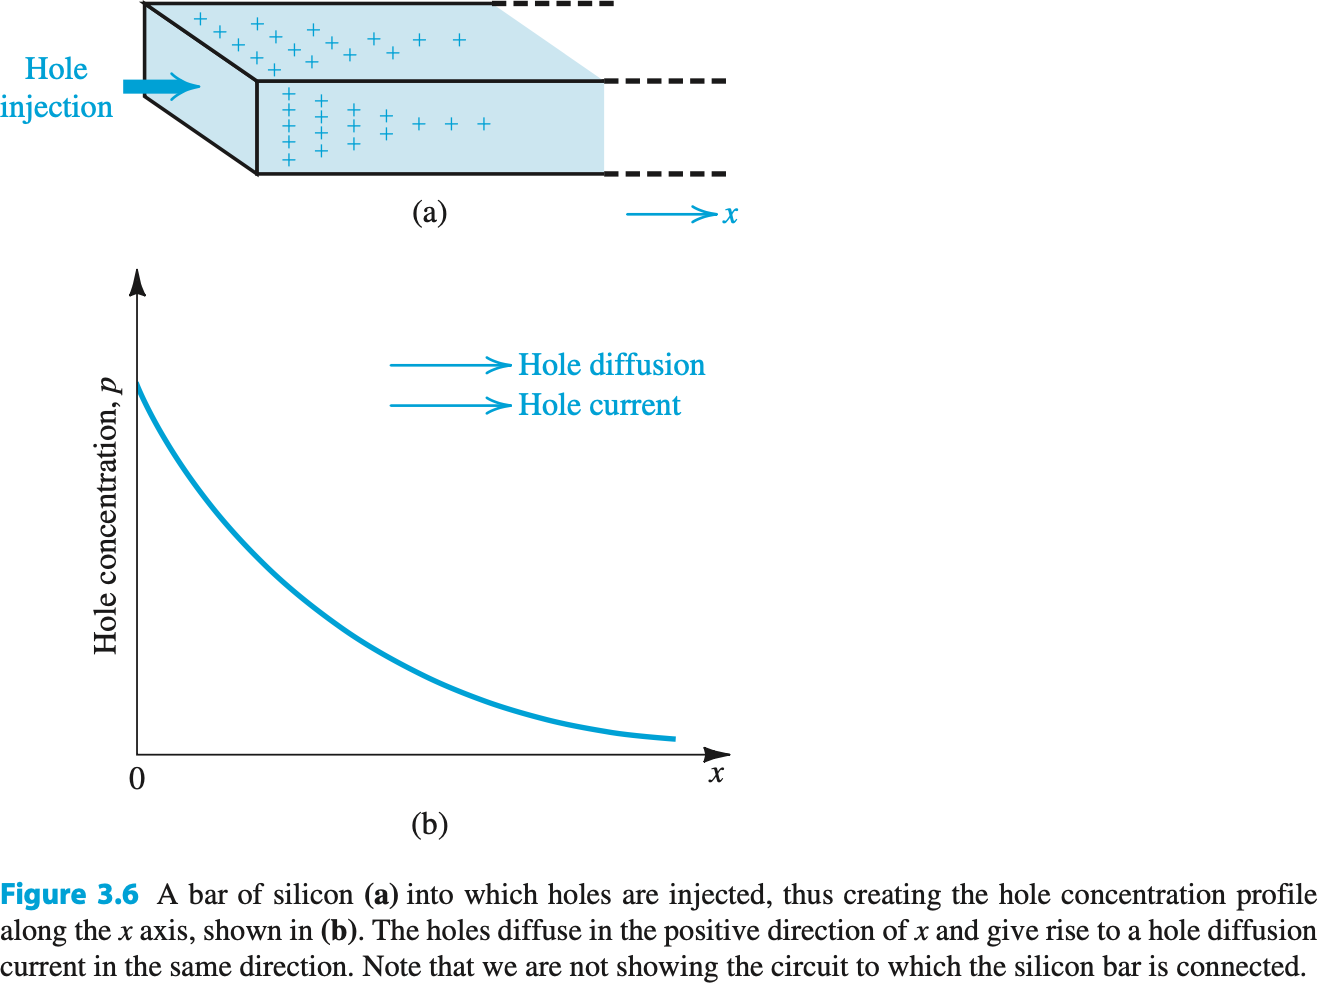

La difusión de portadores ocurre cuando la densidad de los portadores de carga en una pieza de semiconductor no es uniforme. Por ejemplo, si por algún mecanismo la concentración de, digamos, huecos, se hace más alta en una parte de una pieza de silicio que en otra, entonces los agujeros se difundirán desde la región de alta concentración a la región de baja concentración. Este proceso de difusión es como el que se observa si se dejan caer unas gotas de tinta en un tanque lleno de agua. La difusión de los portadores de carga da lugar a un flujo neto de carga o corriente de difusión.

Como ejemplo, considere la barra de silicio que se muestra en la figura: Mediante algún proceso no especificado, hemos dispuesto que se inyecten huecos en su lado izquierdo. Esta inyección de huecos continua da lugar y mantiene un perfil de concentración de huecos. Este perfil, a su vez, hace que los huecos se difundan de izquierda a derecha a lo largo de la barra de silicio, lo que da como resultado una corriente de agujero en la dirección $ x $. La magnitud de la corriente en cualquier punto es proporcional a la pendiente del perfil de concentración, o al gradiente de concentración, en ese punto,
$$
J_ {p} = - q D_{p} \frac{dp(x)} {dx}
$$


donde $ J_{p} $ es la densidad de corriente del hueco $ \left(\mathrm {A}/\mathrm {cm} ^ {2} \right), q $ es la magnitud de la carga del electrón, $ D_{p} $ es una constante llamada constante de difusión o difusividad de los agujeros; y $ p (x) $ es la concentración del hueco en el punto $ x. $ Tenga en cuenta que el gradiente $ (d p / d x) $ es negativo, lo que da como resultado una corriente positiva en la dirección $ x $, como debería esperarse.

En el caso de la difusión de electrones resultante de un gradiente de concentración de electrones (véase la figura 3.7), se aplica una relación similar, que da la densidad de corriente de electrones,
$$
J_{n} = q D_{n} \frac {dn(x)}{dx}
$$
donde $ D_{n} $ es la constante de difusión o difusividad de los electrones. Observe que un $ (d n / d x) $ negativo da lugar a una corriente negativa, resultado de la convención de que la dirección positiva de la corriente se toma como la del flujo de carga positiva (y opuesta a la del flujo de carga negativa). Para huecos y electrones que se difunden en silicio intrínseco, los valores típicos de las constantes de difusión son $ D_{p} = 12\mathrm{~ cm}^{2}/ \mathrm{s} $ y $ D_{n} = 35\mathrm{~ cm}^{2}/\mathrm {s} $

Adónde va la corriente de difusión en la barra de silicio de la figura? Una buena pregunta, ya que no mostramos cómo el extremo derecho de la barra está conectado al resto del circuito. Abordaremos esta y las preguntas relacionadas en detalle en la siguiente seccion donde discutiremos la unión $ p n $.

##### Ejemplo

Considere una barra de silicio en la que un perfil de concentración de huecos descrito por
$$
p (x) = p_{0} e^{- x/L_{p}}
$$
está establecido. Encuentre la densidad de corriente de pozo en $ x = 0 $. Sea $ p_{0} = 10^{16} / \mathrm {cm}^{3}, L_ {p} = 1 \mu \mathrm{m} $ y $ D_{p} = 12 \mathrm{~ cm} ^ {2} / \mathrm{s} $. Si el área de la sección transversal de la barra es $ 100\mu \mathrm{m}^{2} $, encuentre el $ I_{p}$ actual.

######Solución

$$
\begin{aligned}
J_{p} &=-q D_{p} \frac{d p(x)}{d x} \\
&=-q D_{p} \frac{d}{d x}\left[p_{0} e^{-x / L_{p}}\right] \\
&=q \frac{D_{p}}{L_{p}} p_{0} e^{-x / L_{p}}
\end{aligned}
$$
Por lo tanto,
$$
\begin{aligned}
J_{p}(0) &=q \frac{D_{p}}{L_{p}} p_{0} \\
&=1.6 \times 10^{-19} \times \frac{12}{1 \times 10^{-4}} \times 10^{16} \\
&=192 \mathrm{~A} / \mathrm{cm}^{2}
\end{aligned}
$$
Usando 
$$
\begin{aligned}
I_p &= J_p \times A \\
&= 192\times 100\times 10^{-8} \\
&= 192 \mu A
\end{aligned}
$$